In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/98/5e/34ccb5bfb8dae555045c2dd13375e01ac8e2c1f200a4e4051e95fb9addf0/absl_py-2.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2

In [2]:

(x_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1).astype(np.float32) / 255.0  

pca = PCA(n_components=50)  
x_pca = pca.fit_transform(x_train)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
x_tsne = tsne.fit_transform(x_pca)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label="Clothing Labels")
plt.title("t-SNE Projection of Fashion MNIST")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

#def evaluate_cluster_separation():
  #  print("Clusters show some separation, especially for distinct categories like shoes and shirts.")
   # print("However, some categories overlap, likely due to similarities in their features, such as T-shirts and dresses.")

#evaluate_cluster_separation()


NameError: name 'tf' is not defined

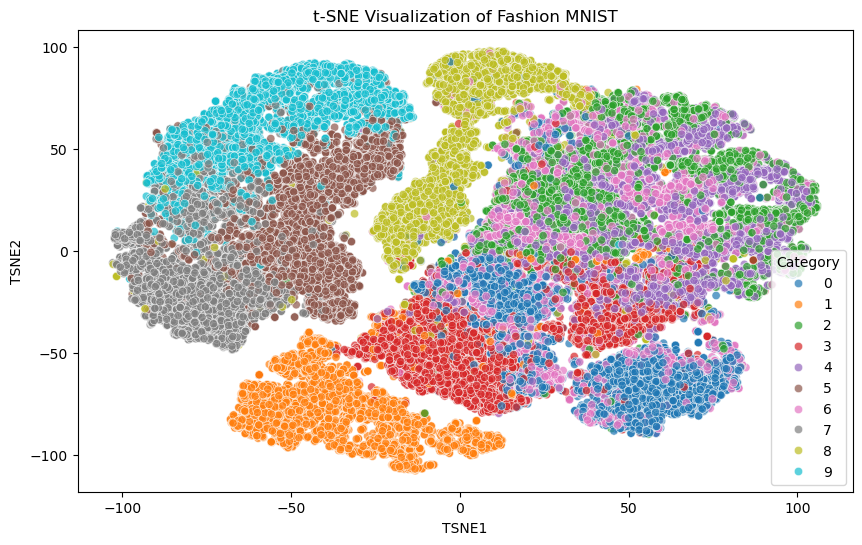

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

file_path = 'fashion-mnist_train.csv'  
data = pd.read_csv(file_path)

labels = data['label']  
features = data.drop('label', axis=1) 


features = features / 255.0

pca = PCA(n_components=50)  
features_pca = pca.fit_transform(features)


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_pca)

tsne_df = pd.DataFrame({'TSNE1': features_tsne[:, 0], 'TSNE2': features_tsne[:, 1], 'Label': labels})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=tsne_df['Label'], palette='tab10', data=tsne_df, alpha=0.7)
plt.title('t-SNE Visualization of Fashion MNIST')
plt.legend(title='Category')
plt.show()
